In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv('./wine.csv', encoding='utf-8')

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
alcohol    6497 non-null float64
sugar      6497 non-null float64
pH         6497 non-null float64
class      6497 non-null float64
dtypes: float64(4)
memory usage: 203.1 KB


In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
data = wine[['alcohol', 'sugar', 'pH']].values
target = wine['class'].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_X, test_X, train_y, test_y = train_test_split(
        data, 
        target, 
        test_size=0.2, 
        random_state=42
)

In [9]:
train_X.shape, train_y.shape

((5197, 3), (5197,))

In [10]:
test_X.shape, test_y.shape

((1300, 3), (1300,))

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
ss = StandardScaler()
ss.fit(train_X)

train_scaled = ss.transform(train_X)
test_scaled = ss.transform(test_X)

In [13]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

In [14]:
lr = LogisticRegression()
lr.fit(train_scaled, train_y)

LogisticRegression()

In [15]:
print(lr.score(train_scaled, train_y))
print(lr.score(test_scaled, test_y))

0.7808350971714451
0.7776923076923077


In [16]:
lr.coef_, lr.intercept_

(array([[ 0.51270274,  1.6733911 , -0.68767781]]), array([1.81777902]))

In [17]:
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무

In [18]:
dt = DecisionTreeClassifier(random_state=42)

In [19]:
dt.fit(train_scaled, train_y)

DecisionTreeClassifier(random_state=42)

In [20]:
print(dt.score(train_scaled, train_y))
print(dt.score(test_scaled, test_y))

0.996921300750433
0.8592307692307692


In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

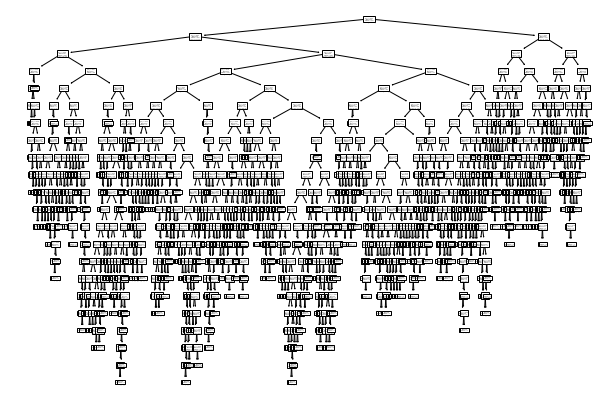

In [22]:
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

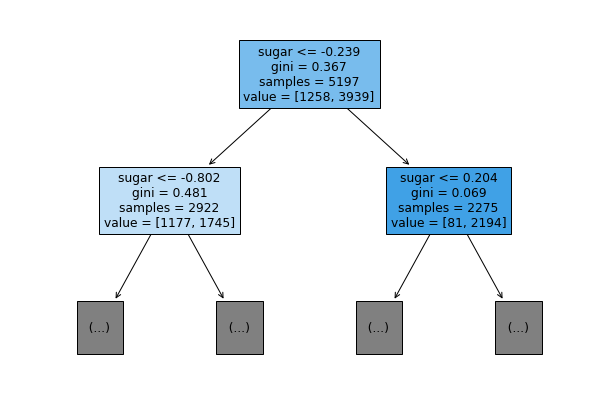

In [23]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [24]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

In [25]:
dt.fit(train_scaled, train_y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [26]:
print(dt.score(train_scaled, train_y))
print(dt.score(test_scaled, test_y))

0.8454877814123533
0.8415384615384616


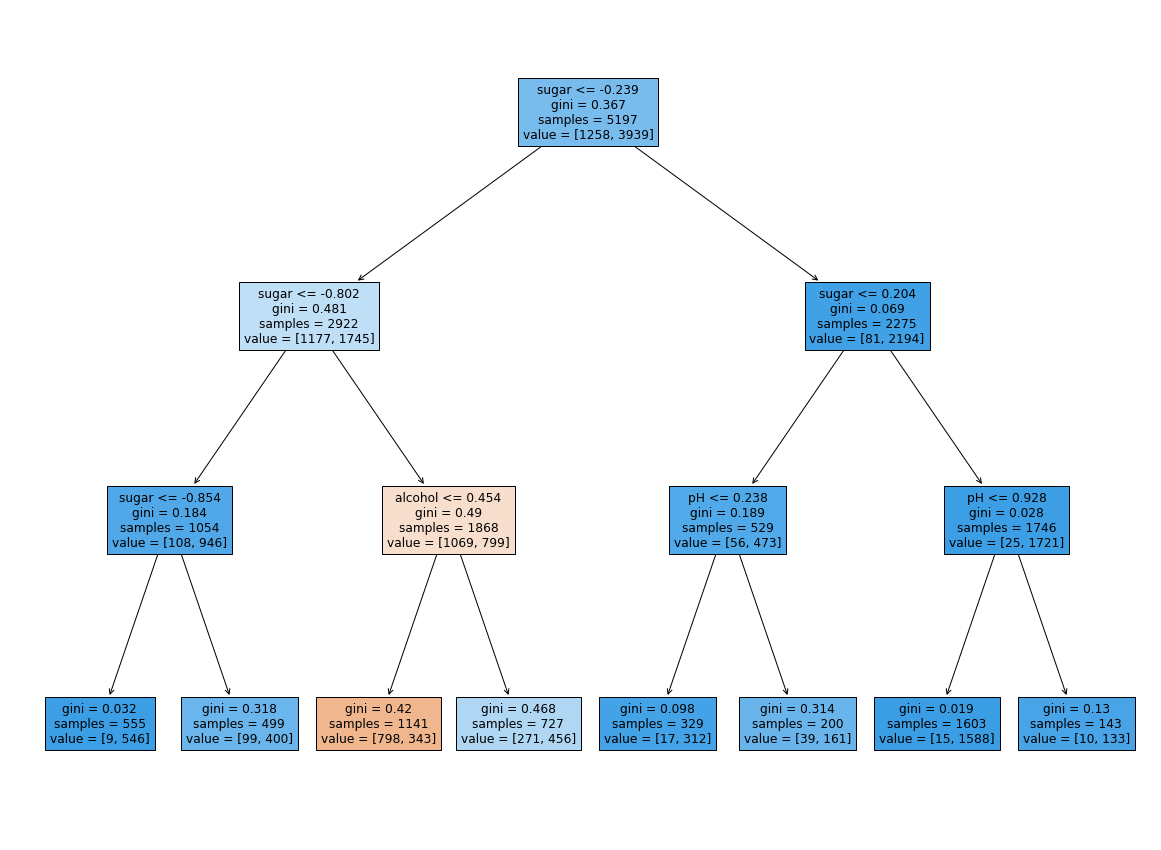

In [27]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [28]:
dt.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [29]:
print(dt.score(train_X, train_y))
print(dt.score(test_X, test_y))

0.8454877814123533
0.8415384615384616


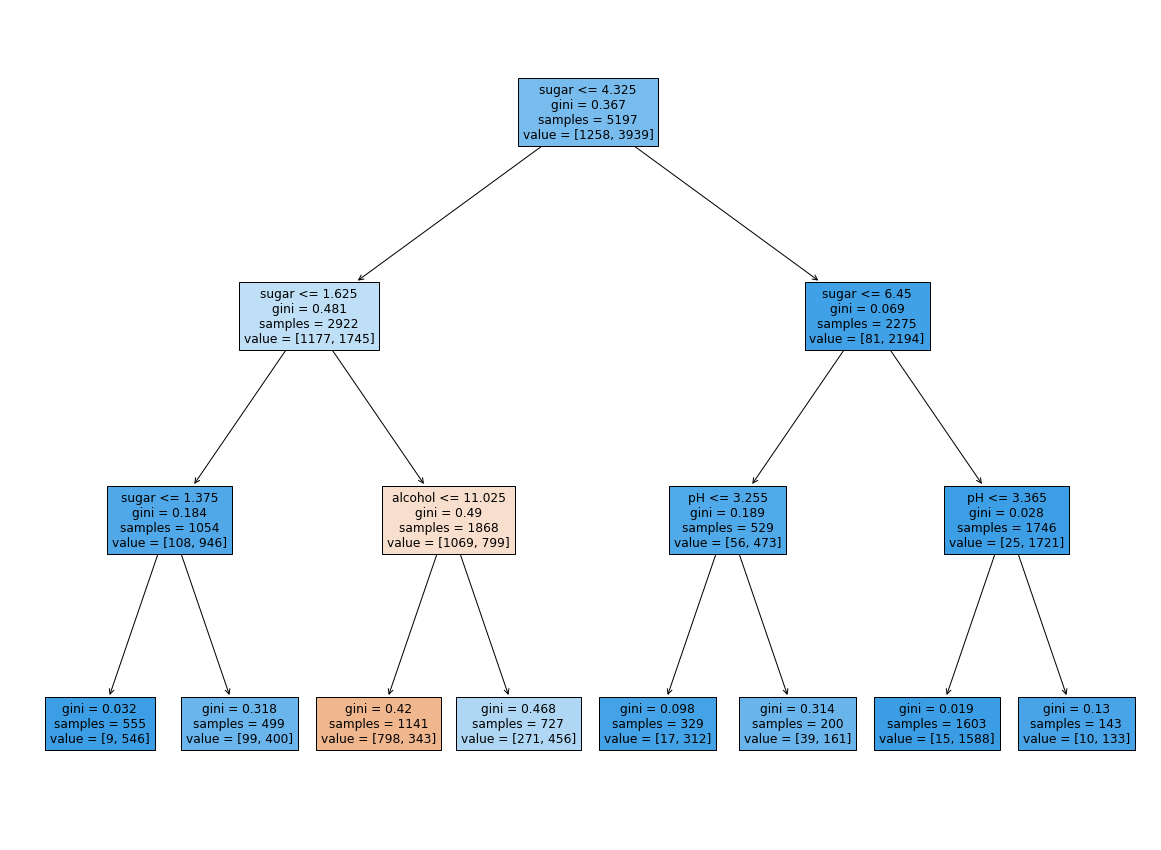

In [30]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [31]:
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

In [32]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)

In [33]:
dt.fit(train_X, train_y)

DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)

In [34]:
print(dt.score(train_X, train_y))
print(dt.score(test_X, test_y))

0.8874350586877044
0.8615384615384616


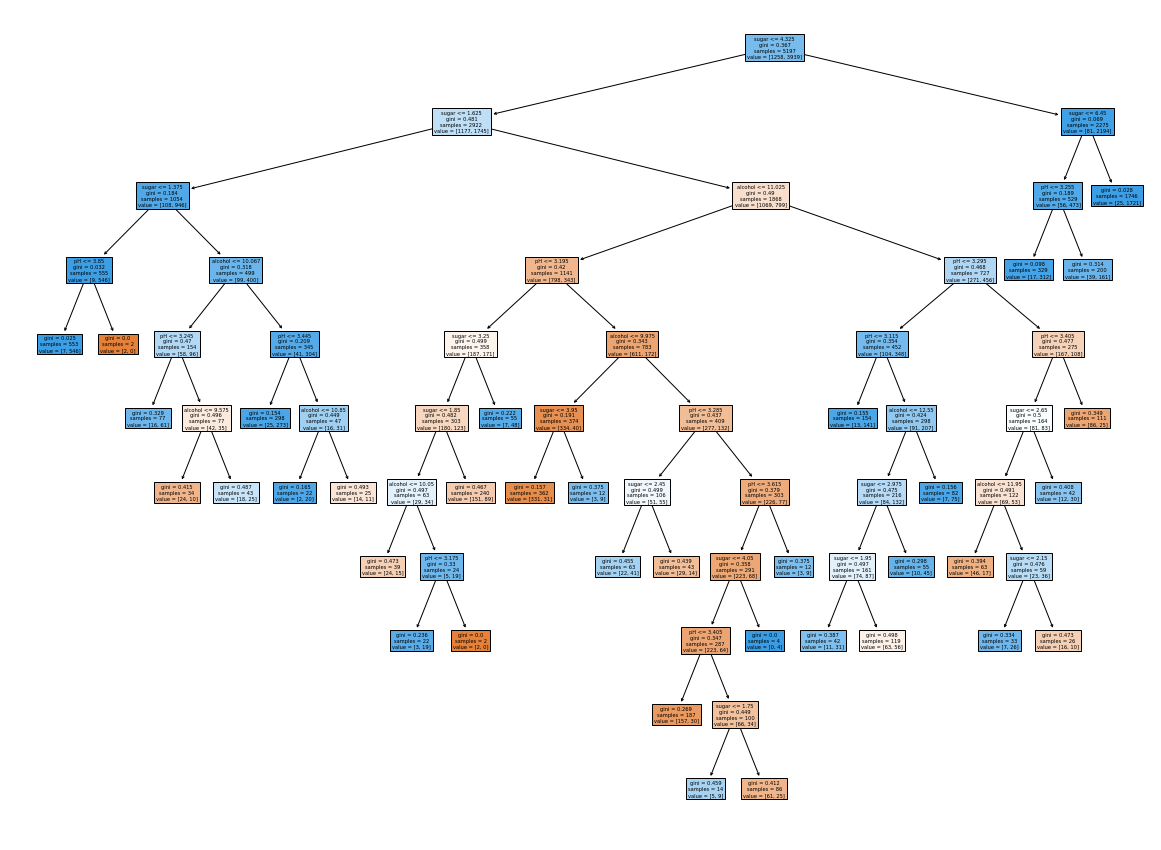

In [35]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()